Saved: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed\im1_processed_corners.jpg
Saved: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed\im10_processed_corners.jpg
Saved: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed\im11_processed_corners.jpg
Saved: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed\im12_processed_corners.jpg
Checkerboard not found in: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\images\im13.jpg
Saved: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed\im14_processed_corners.jpg
Saved: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed\im15_processed_corners.jpg
Checkerboard not found in: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\images\im16.jpg
Saved: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed\im17_processed_corners.jpg
Checkerboard not found in: C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\images\im18.jpg
Checkerboard n

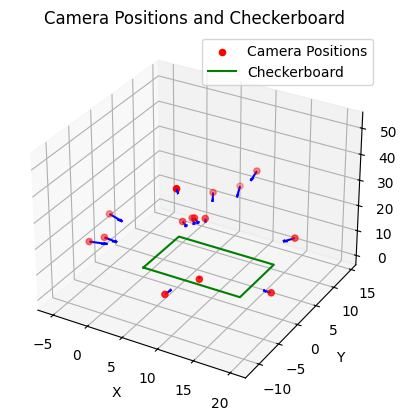

In [1]:
#PROBLEM 1

# This code first loads and pinpoints the corners on the board from 20 different images. If the board can't be detected, the image is skipped.To make detection easier
# I scale the image size down, increase contrast, and greyscale it. The changes to K matrix from rescaling it is then reversed after calibration is done.
# Then I use open cv to calibrate the camera based on the detected corners from different angles and the according 2D and 3D points. This gives the K matrix.
# The rotation and translation vectors are then extracted and printed along with the K matrix. Finally, the camera positions for all 20 images are located and plotted.

import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#resize function
def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dimensions = (width, height)
    resized_image = cv2.resize(image, dimensions, interpolation=cv2.INTER_AREA)
    return resized_image

checkerboard_size = (15, 10)  
square_size = 1.0  

#object points for the checkerboard
objp = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2) * square_size

objpoints = []  
imgpoints = []  

images = glob.glob(r'C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\images\im*.jpg')  
output_dir = r'C:\Users\nihal\OneDrive\Desktop\.vscode\CompVision\hw3\processed'
os.makedirs(output_dir, exist_ok=True)

for img_path in images:

    #rescale, greyscale, contrast
    img = cv2.imread(img_path)
    img = resize_image(img,50)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_eq = cv2.equalizeHist(gray)

    cv2.imshow('Processed Image', gray_eq)
    cv2.waitKey(500)

    ret, corners = cv2.findChessboardCorners(gray_eq, checkerboard_size, None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
        corner_image = img.copy()
        cv2.drawChessboardCorners(corner_image, checkerboard_size, corners, ret)
        
        output_path = os.path.join(output_dir, os.path.basename(img_path).replace('.jpg', '_processed_corners.jpg'))
        cv2.imwrite(output_path, corner_image)
        print(f'Saved: {output_path}')
    else:
        print(f'Checkerboard not found in: {img_path}')

cv2.destroyAllWindows()

#calibration
ret, K, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

#offset rescaling
K = K*2
K[2, 2] = 1
# Print K and rotation / translation matrices
print("Camera Matrix (K):")
print(K)
print("\nRotation Vectors (R):")
for rvec in rvecs:
    print(rvec)
print("\nTranslation Vectors (t):")
for tvec in tvecs:
    print(tvec)

R_matrices = []
camera_positions = []
viewing_vectors = []

#camera pos and viewing vectors
for rvec, tvec in zip(rvecs, tvecs):
    R, _ = cv2.Rodrigues(rvec)
    R_matrices.append(R)
    
    camera_position = -R.T @ tvec
    camera_positions.append(camera_position)
    
    viewing_direction = R.T @ np.array([0, 0, -1])
    viewing_vectors.append(viewing_direction)

#camera positions
X = [pos[0] for pos in camera_positions]
Y = [pos[1] for pos in camera_positions]
Z = [-pos[2] for pos in camera_positions]  

#veiwing vectors
U = [vec[0] for vec in viewing_vectors]
V = [vec[1] for vec in viewing_vectors]
W = [-vec[2] for vec in viewing_vectors]  

#ALL PLOTTING BELOW
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#camera postions
ax.scatter(X, Y, Z, c='r', marker='o', label='Camera Positions')
scale_factor = -3  

#camera viewing vectors
for i in range(len(camera_positions)):
    wtc = camera_positions[i]
    camera_direction = viewing_vectors[i]
    ax.quiver(
        wtc[0], wtc[1], -wtc[2], 
        camera_direction[0] * scale_factor, 
        camera_direction[1] * scale_factor, 
        -camera_direction[2] * scale_factor, 
        color='b'
    )

#Plot the checkerboard
corner_points = objp[[0, checkerboard_size[0] - 1, -1, -(checkerboard_size[0])]]  # 4 corners

ax.plot([corner_points[0, 0], corner_points[1, 0], corner_points[2, 0], corner_points[3, 0], corner_points[0, 0]],
        [corner_points[0, 1], corner_points[1, 1], corner_points[2, 1], corner_points[3, 1], corner_points[0, 1]],
        [0, 0, 0, 0, 0],  
        color='g', label='Checkerboard')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Camera Positions and Checkerboard')

plt.legend()
plt.show()


Problem 1:

Upon analyzing the picture properties and the K matrix:
Camera Matrix (K):
[[3.16174182e+03 0.00000000e+00 1.55575913e+03]
 [0.00000000e+00 3.15807362e+03 2.00395827e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]],

 I have concluded that the program has worked correctly and as intended.
 The focal length values correlate with the numbers I see online for this camera and the x and y translation correlates with the size of the image.

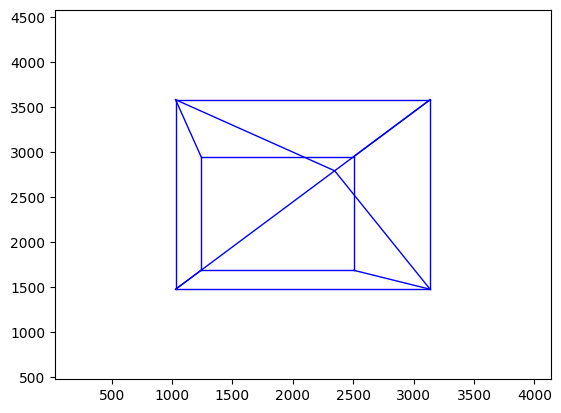

In [2]:
#PROBLEM 2

#cTw matrix is deffined and so are vertices for a house. The coordinates are projected to a 2D plane via the projection pipeline using the cTw and calibrated K matrix.
#Once the vertices are projected, lines are drawn between the points.

from matplotlib.lines import Line2D

#cTw
cTw = np.array([
    [1, 0, 0, 0.5],
    [0, 1, 0, 0.5],
    [0, 0, 1, 5]
])


vertices = np.array([[1, 1, 0, 1],
                     [1, -1, 0, 1],
                     [-1, -1, 0, 1],
                     [-1, 1, 0, 1],
                     [1, 1, -2, 1],
                     [1, -1, -2, 1],
                     [-1, -1, -2, 1],
                     [-1, 1, -2, 1],
                     [0, 0, -3, 1]
                     ]) 

projected_vertices = []
for vertex in vertices:
    
    vertex_homogeneous = np.array([vertex[0], vertex[1], vertex[2], 1])
    
    P_c = np.dot(cTw, vertex_homogeneous)
    
    p = np.dot(K, P_c)
    p /= p[2]  
    projected_vertices.append(p[:2])

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  #bottom
    [4, 5], [5, 6], [6, 7], [7, 4],  #top
    [0, 4], [1, 5], [2, 6], [3, 7],  #vert
    [4, 8], [5, 8], [6, 8], [7, 8]   #roof
]

projected_vertices = np.array(projected_vertices)

fig, ax = plt.subplots()
ax.set_xlim(min(projected_vertices[:, 0]) - 1000, max(projected_vertices[:, 0]) + 1000)
ax.set_ylim(min(projected_vertices[:, 1]) - 1000, max(projected_vertices[:, 1]) + 1000)

for edge in edges:
    line = Line2D(
        [projected_vertices[edge[0]][0], projected_vertices[edge[1]][0]],
        [projected_vertices[edge[0]][1], projected_vertices[edge[1]][1]],
        linewidth=1, color='blue'
    )
    ax.add_line(line)
 
plt.show()



Problem 2:

The object model I am projecting is a simple house. It is a rectangular prism with a pyramid roof.
To image, I chose to look at the center from above shifted a bit by the x and y, hence this is a top down view of the house.

[[ 1  1  0  1]
 [ 1 -1  0  1]
 [-1 -1  0  1]
 [-1  1  0  1]
 [ 1  1 -2  1]
 [ 1 -1 -2  1]
 [-1 -1 -2  1]
 [-1  1 -2  1]
 [ 0  0 -3  1]]


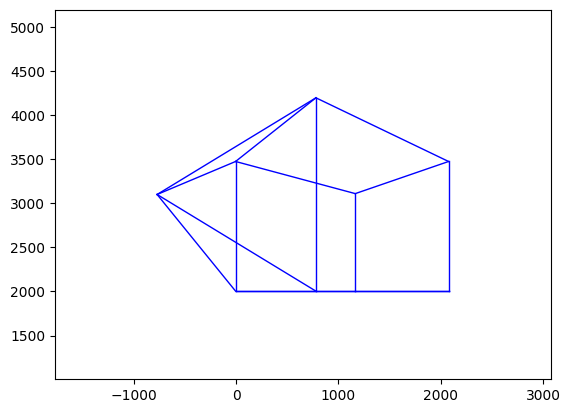

In [3]:
#PROBLEM 3

#Code is essentially the same as before but a rotation and translation is applied.

from matplotlib.lines import Line2D

#cTw
cTw = np.array([
    [0.707, 0, 0.707, 0],
    [0, 1, 0, 1],
    [-0.707, 0, 0.707, 5]
])

vertices = np.array([[1, 1, 0, 1],
                     [1, -1, 0, 1],
                     [-1, -1, 0, 1],
                     [-1, 1, 0, 1],
                     [1, 1, -2, 1],
                     [1, -1, -2, 1],
                     [-1, -1, -2, 1],
                     [-1, 1, -2, 1],
                     [0, 0, -3, 1]
                     ]) 

print(vertices)

projected_vertices = []
for vertex in vertices:
    
    vertex_homogeneous = np.array([vertex[0], vertex[1], vertex[2], 1])
    
    P_c = np.dot(cTw, vertex_homogeneous)
    
    p = np.dot(K, P_c)
    p /= p[2]  
    projected_vertices.append(p[:2])

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  #bottom
    [4, 5], [5, 6], [6, 7], [7, 4],  #top
    [0, 4], [1, 5], [2, 6], [3, 7],  #vert
    [4, 8], [5, 8], [6, 8], [7, 8]   #roof
]

projected_vertices = np.array(projected_vertices)

fig, ax = plt.subplots()
ax.set_xlim(min(projected_vertices[:, 0]) - 1000, max(projected_vertices[:, 0]) + 1000)
ax.set_ylim(min(projected_vertices[:, 1]) - 1000, max(projected_vertices[:, 1]) + 1000)

for edge in edges:
    line = Line2D(
        [projected_vertices[edge[0]][0], projected_vertices[edge[1]][0]],
        [projected_vertices[edge[0]][1], projected_vertices[edge[1]][1]],
        linewidth=1, color='blue'
    )
    ax.add_line(line)
 
plt.show()


Problem 3:

This looks correct based on the rotations applied to the camera matrix. 
This is what the image should look like after the rotation of 45 degrees is applied along the y axis and the assigned camera shift.

In [4]:
#PROBLEM 4

#PnP algorith is used here to take the 3d points of the house and its corresponding 2d points to estimate the position and rotation of the camera
#To verify the estimated camera poise, I use the new camera rotation and position to reproject the original 3d points. Then, error can be calculated.

import cv2
import numpy as np

#3d points
object_points = np.array([
    [1, 1, 0],
    [1, -1, 0],
    [-1, -1, 0],
    [-1, 1, 0],
    [1, 1, -2],
    [1, -1, -2],
    [-1, -1, -2],
    [-1, 1, -2],
    [0, 0, -3]
], dtype=np.float32)

#2d points
image_points = np.array(projected_vertices, dtype=np.float32)

#pnp algorithm
success, rotation_vector, translation_vector = cv2.solvePnP(object_points, image_points, K, dist_coeffs)

if success:
    rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

    print("Rotation Matrix:\n", rotation_matrix)
    print("Translation Vector:\n", translation_vector)
else:
    print("PnP solution failed")

#FOR ERROR
#reproject points
reprojected_points, _ = cv2.projectPoints(object_points, rotation_vector, translation_vector, K, dist_coeffs)

reprojected_points = reprojected_points.reshape(-1, 2)

#calculate error from image points to reprojected points
errors = np.linalg.norm(image_points - reprojected_points, axis=1)
mean_error = np.mean(errors)

print(f"Reprojection Error: {mean_error:.4f} pixels")


Rotation Matrix:
 [[ 0.70350912 -0.01077108  0.7106046 ]
 [-0.01084876  0.99960587  0.02589209]
 [-0.71060342 -0.0259245   0.703115  ]]
Translation Vector:
 [[0.01316219]
 [1.06793706]
 [5.32772833]]
Reprojection Error: 62.7620 pixels


Problem 4:

My implementation uses the PnP algorithm to estimate the camera's pose given the set of known 3D points (object_points) and their corresponding 2D projections (image_points). The cv2.solvePnP function computes the rotation vector and translation vector, which are then converted into a rotation matrix using cv2.Rodrigues. 

The camera pose is correct and verified. To verify the accuracy, the 3D points were reprojected onto the image plane using the calculated pose, and the reprojection error is computed by comparing the original 2D points with the reprojected ones. This error is very minimal meaning the pose estimation is accurate.